In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

cars = pd.read_csv('Cars93.csv')

In [2]:
cars.drop(columns=['Unnamed: 0', 'Model', 'AirBags', 'Make'], inplace = True)

cars.dropna(inplace = True)

## Breakout categorical columns

In [3]:
breakout = pd.get_dummies(cars['Manufacturer'])
breakout.drop(columns='Acura', inplace = True)
cars = cars.merge(breakout, how = 'inner', left_index = True, right_index = True)

breakout = pd.get_dummies(cars['DriveTrain'])
breakout.drop(columns='Front', inplace = True)
cars = cars.merge(breakout, how = 'inner', left_index = True, right_index = True)

breakout = pd.get_dummies(cars['Cylinders'])
breakout.drop(columns='4', inplace = True)
cars = cars.merge(breakout, how = 'inner', left_index = True, right_index = True)

breakout = pd.get_dummies(cars['Man.trans.avail'])
breakout.drop(columns='Yes', inplace = True)
cars = cars.merge(breakout, how = 'inner', left_index = True, right_index = True)

breakout = pd.get_dummies(cars['Origin'])
breakout.drop(columns='non-USA', inplace = True)
cars = cars.merge(breakout, how = 'inner', left_index = True, right_index = True)

cars = cars.merge(breakout, how = 'inner', left_index = True, right_index = True)
cars.drop(columns = ['Origin', 'Man.trans.avail', 'Cylinders', 'DriveTrain', 'Manufacturer'], inplace = True)



## Classify Car Type

In [4]:
X = cars.drop(columns = 'Type')
y = cars.Type

sc = StandardScaler()                           #Scaling not required for random forest classifier/regressor
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,...,Volvo,4WD,Rear,3,5,6,8,No,USA_x,USA_y
0,-0.442840,-0.330430,-0.238728,0.344393,0.205685,-0.790665,0.000961,1.675302,1.056436,-0.973784,...,-0.158114,-0.254824,-0.453743,-0.194871,-0.111111,-0.643268,-0.280976,-0.681385,-1.024695,-1.024695
1,1.395357,1.488045,1.510518,-0.914727,-0.999040,0.612246,1.183396,0.296383,-0.066498,0.630575,...,-0.158114,-0.254824,-0.453743,-0.194871,-0.111111,1.554563,-0.280976,-0.681385,-1.024695,-1.024695
2,1.023207,1.003118,0.947946,-0.554978,-0.798253,0.211414,0.631593,0.296383,-0.177779,0.262909,...,-0.158114,-0.254824,-0.453743,-0.194871,-0.111111,1.554563,-0.280976,-0.681385,-1.024695,-1.024695
3,1.575794,1.871945,2.029139,-0.734852,-0.798253,0.211414,0.631593,0.296383,0.338163,1.666724,...,-0.158114,-0.254824,-0.453743,-0.194871,-0.111111,1.554563,-0.280976,-0.681385,-1.024695,-1.024695
4,0.775107,1.094042,1.290763,-0.195229,0.004897,0.912869,1.341054,0.641113,0.358396,1.666724,...,-0.158114,-0.254824,2.203893,-0.194871,-0.111111,-0.643268,-0.280976,-0.681385,-1.024695,-1.024695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,-0.916486,-1.017410,-1.056215,0.344393,0.607260,-0.790665,-1.161766,0.296383,0.368513,-1.241177,...,-0.158114,-0.254824,-0.453743,-0.194871,-0.111111,-0.643268,-0.280976,-0.681385,-1.024695,-1.024695
78,0.087193,0.083778,0.077718,-0.375104,0.004897,-0.590249,-0.117282,0.813478,0.641659,0.797696,...,-0.158114,-0.254824,-0.453743,-0.194871,-0.111111,-0.643268,-0.280976,-0.681385,-1.024695,-1.024695
79,0.684889,0.417165,0.191990,-0.914727,-0.999040,0.211414,0.749837,0.813478,0.034668,0.797696,...,-0.158114,-0.254824,-0.453743,-0.194871,-0.111111,1.554563,-0.280976,-0.681385,-1.024695,-1.024695
80,0.560839,0.356549,0.174410,-0.375104,-0.396678,-0.289625,-0.511427,0.124019,-0.309294,-0.104756,...,6.324555,-0.254824,2.203893,-0.194871,-0.111111,-0.643268,-0.280976,-0.681385,-1.024695,-1.024695


In [5]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=5)

In [6]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_scaled_train, y_train)

prediction = clf.predict(X_scaled_test)
predSeries = pd.Series(prediction)

In [7]:
clf.score(X_scaled_test, y_test)

0.84

In [8]:
y_test = y_test.reset_index(drop = 'True')

df = pd.concat([y_test, predSeries], axis=1)
df.columns = ['True','Predicted']
df

,True,Predicted
0,Midsize,Large
1,Compact,Small
2,Midsize,Large
3,Small,Small
4,Midsize,Midsize
5,Compact,Compact
6,Compact,Compact
7,Compact,Compact
8,Sporty,Small
9,Small,Small


In [9]:
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": clf.feature_importances_}
).sort_values("importance", ascending=False)
feature_importances_df.sort_values(by='importance', ascending = False).head(5)

,feature,importance
11,Length,0.109055
13,Width,0.093901
9,Fuel.tank.capacity,0.083810
12,Wheelbase,0.066406
10,Passengers,0.064297


In [10]:
feature_importances_df.sort_values(by='importance', ascending = False).tail(5) #least important features

,feature,importance
43,Saturn,0.0
52,5,0.0
37,Mitsubishi,0.0
35,Mercedes-Benz,0.0
32,Lexus,0.0


## MPG Regression

In [11]:
X = cars.drop(columns = 'MPG.highway')
breakout = pd.get_dummies(X['Type'])
breakout.drop(columns='Compact', inplace = True)

X = X.merge(breakout, how = 'inner', left_index = True, right_index = True)
X = X.drop(columns = ['MPG.city', 'Type'])

y = cars['MPG.highway']

sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled

X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=7)

In [12]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_scaled_train, y_train)

regr = RandomForestRegressor(random_state=0)
regr.fit(X_scaled_train, y_train)
regr.score(X_scaled_test, y_test)

prediction = regr.predict(X_scaled_test)
predSeries = pd.Series(prediction)
y_test = y_test.reset_index(drop = 'True')

df = pd.concat([y_test, predSeries], axis=1)
df.columns = ['True','Predicted']

In [13]:
df

,True,Predicted
0,29,29.08
1,46,33.46
2,30,30.22
3,28,29.38
4,27,29.93
5,34,30.45
6,30,32.42
7,26,26.48
8,34,33.39
9,26,27.97


Text(0, 0.5, 'Predicted MPG')

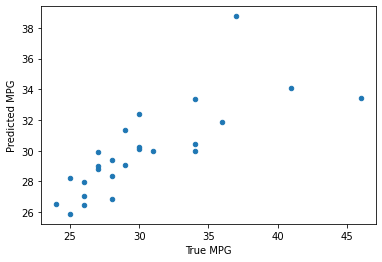

In [14]:
ax = df.plot(kind = 'scatter', x='True',y='Predicted')
ax. set_xlabel('True MPG')
ax.set_ylabel('Predicted MPG')

In [15]:
regr.score(X_scaled_test, y_test)

0.5490680966873465

In [16]:
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": clf.feature_importances_}
).sort_values("importance", ascending=False)
feature_importances_df.sort_values(by='importance', ascending = False).head(5)

,feature,importance
15,Weight,0.078661
0,Min.Price,0.072950
6,Rev.per.mile,0.070499
4,Horsepower,0.066593
10,Wheelbase,0.054302


In [17]:
feature_importances_df.sort_values(by='importance', ascending = False).tail(5) #least important features

,feature,importance
45,Volkswagen,0.000692
21,Chrylser,0.000300
38,Plymouth,0.000000
22,Chrysler,0.000000
50,5,0.000000
